
=== PCA SUMMARY ===
Eigenvalue 1: 179.3666
Eigenvalue 2: 161.6603
Explained variance by PC1: 14.90%
Explained variance by PC2: 13.43%
Total explained variance: 28.32%



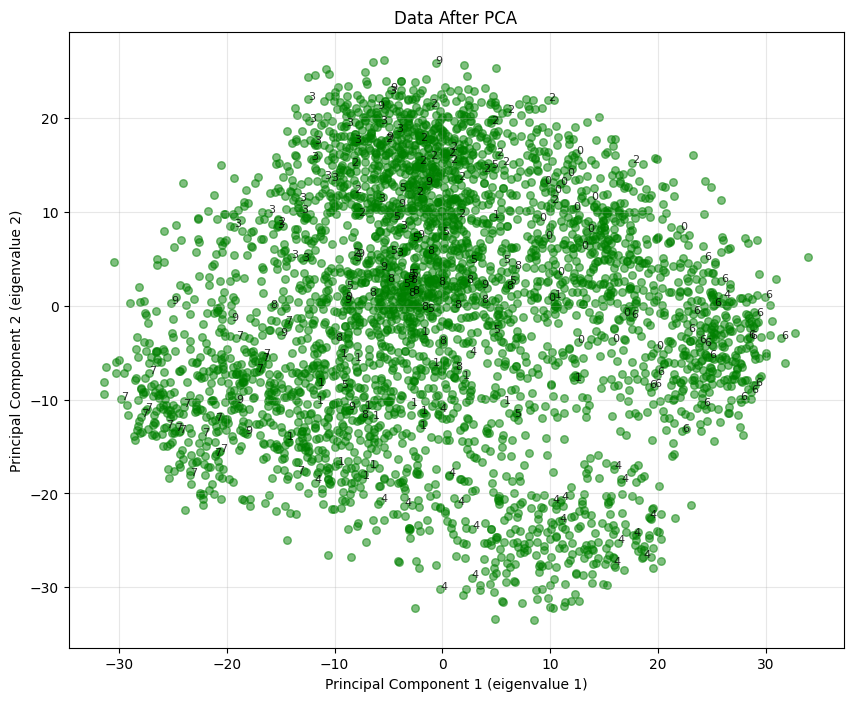

In [ ]:
#Question 2 Implementation

import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    # Separate features and labels
    X = data[:, :-1]  # All columns except the last one
    y = data[:, -1]   # Last column (class labels)
    return X, y

# Implement PCA from scratch
def pca_from_scratch(X, n_components=2):
    # Step 1: Normalize the data (center the data)
    # Compute mean without using mean() function
    n_samples = X.shape[0]
    X_mean = np.sum(X, axis=0) / n_samples
    X_centered = X - X_mean

    # Step 2: Compute the covariance matrix without using cov()
    # Σ = (1/n) * X^T * X where X is centered
    n_features = X.shape[1]
    cov_matrix = np.zeros((n_features, n_features))
    for i in range(n_samples):
        x_i = X_centered[i, :].reshape(-1, 1)  # Convert to column vector
        cov_matrix += np.dot(x_i, x_i.T)
    cov_matrix = cov_matrix / n_samples

    # Step 3: Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4: Sort eigenvectors by decreasing eigenvalues
    idx = eigenvalues.argsort()[::-1]  # Indices in descending order
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Step 5: Select top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Step 6: Project data onto principal components
    X_pca = np.dot(X_centered, top_eigenvectors)

    return X_pca, top_eigenvectors, eigenvalues

# Function to plot the 2D projections with annotations
def plot_pca_projections(X_pca, y, num_annotations=200):
    plt.figure(figsize=(10, 8))

    # Plot all data points with one color
    plt.scatter(X_pca[:, 0], X_pca[:, 1], color='green', alpha=0.5, s=30)

    # Randomly select 200 instances for annotation
    indices = random.sample(range(len(X_pca)), num_annotations)

    # Annotate the selected points with their class labels
    for idx in indices:
        plt.annotate(
            str(int(y[idx])),  # Convert class label to integer
            (X_pca[idx, 0], X_pca[idx, 1]),
            fontsize=8,
            alpha=0.8
        )

    plt.title('Data After PCA')
    plt.xlabel('Principal Component 1 (eigenvalue 1)')
    plt.ylabel('Principal Component 2 (eigenvalue 2)')
    plt.grid(alpha=0.3)
    plt.savefig('pca_projection.png', dpi=300)
    plt.show()

# Function to print summary of PCA results
def print_pca_summary(eigenvalues, principal_components):
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues[:2] / total_variance

    print("\n=== PCA SUMMARY ===")
    print(f"Eigenvalue 1: {eigenvalues[0]:.4f}")
    print(f"Eigenvalue 2: {eigenvalues[1]:.4f}")
    print(f"Explained variance by PC1: {explained_variance_ratio[0]*100:.2f}%")
    print(f"Explained variance by PC2: {explained_variance_ratio[1]*100:.2f}%")
    print(f"Total explained variance: {np.sum(explained_variance_ratio)*100:.2f}%")
    print("===================\n")

# Main function
def main():
    # Load the data
    X, y = load_data('data.txt')

    # Implement PCA and get the 2D projections
    X_pca, principal_components, eigenvalues = pca_from_scratch(X, n_components=2)

    # Print summary of PCA results
    print_pca_summary(eigenvalues, principal_components)

    # Plot the 2D projections with annotations
    plot_pca_projections(X_pca, y, num_annotations=200)

if __name__ == "__main__":
    main()